# This document is part of the work of the Data Science Team, with Elaine having main credit for this document.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import pearsonr, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
df = pd.read_csv("amazon.csv")

df['category'] = df['category'].replace({'Home entertainment': 'Home Entertainment'})
df['category'] = df['category'].replace({'Smart-home speakers ': 'Smart-home speakers'})
df['category'] = df['category'].replace({'Smart Lightning': 'Smart Lighting'})

df['price'] = df['price'].str.replace('€', '').str.strip()  

df['price'] = pd.to_numeric(df['price'], errors='coerce')  

df.to_csv("cleaned_amazon.csv", index=False)

df


,id,prod_name,price,category,country,source,author,review_txt,rating,bought_in_past_month,nums_of_reviews,day,month,year
0,1,Echo Dot (Newest gen) smart speaker with Alexa...,25.99,Smart-home speakers,Germany,amazon,Genton,"Der Echo Dot (5. Gen., 2022) ist ein beeindruc...",5.0,"5,000+","66,160 ratings",17,11,2024
1,2,Echo Dot (Newest gen) smart speaker with Alexa...,25.99,Smart-home speakers,Germany,amazon,Angie,Ich habe mir den neuen Echo Dot (Neueste Gener...,4.0,"5,000+","66,160 ratings",9,12,2024
2,3,Echo Dot (Newest gen) smart speaker with Alexa...,25.99,Smart-home speakers,Germany,amazon,Marco,Der Amazon Echo Dot ist ein beeindruckend viel...,5.0,"5,000+","66,160 ratings",9,12,2024
3,4,Echo Dot (Newest gen) smart speaker with Alexa...,25.99,Smart-home speakers,Germany,amazon,Jil,Der Echo Dot ist für mich ein unglaublich viel...,5.0,"5,000+","66,160 ratings",4,12,2024
4,5,Echo Dot (Newest gen) smart speaker with Alexa...,25.99,Smart-home speakers,Germany,amazon,Marcel Daniels,"Ich habe den neuesten Echo Dot gekauft, um mei...",5.0,"5,000+","66,160 ratings",29,11,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,31,TOKIT Omni Cook Robot All-in-1 Food Processor ...,921.39,Smart kitchen aplications,Canada,amazon,Doris Charette,NaN,5.0,not found,48 ratings,14,7,2023
4281,32,TOKIT Omni Cook Robot All-in-1 Food Processor ...,921.39,Smart kitchen aplications,Canada,amazon,jocelyn tessier,NaN,3.0,not found,48 ratings,15,10,2024
4282,33,TOKIT Omni Cook Robot All-in-1 Food Processor ...,921.39,Smart kitchen aplications,the United States,amazon,Dennie,I just put the materials for cooking braised p...,5.0,not found,48 ratings,29,1,2023
4283,34,TOKIT Omni Cook Robot All-in-1 Food Processor ...,921.39,Smart kitchen aplications,the United States,amazon,Carol Liang,NaN,5.0,not found,48 ratings,6,11,2022


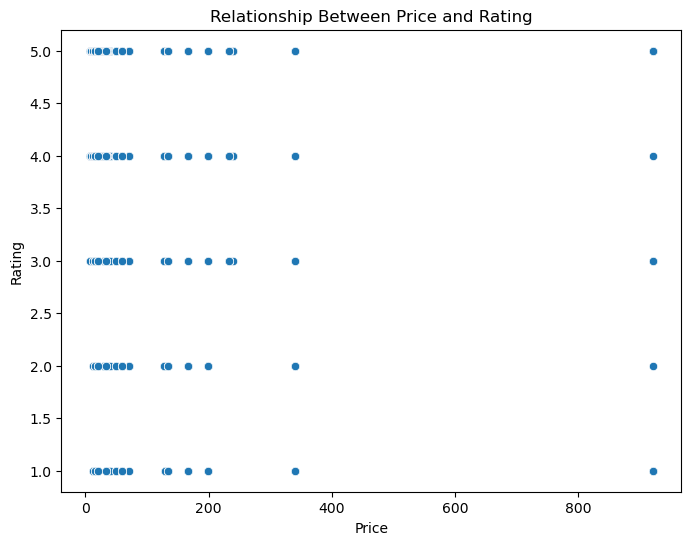

In [ ]:
df_clean = df[(df['price'] > 0) & (df['rating'].notnull())]

plt.figure(figsize=(8, 6))#inches
sns.scatterplot(x='price', y='rating', data=df_clean)  
plt.title('Relationship Between Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

#-----------------------------------------------------------------------------------------------------------------

#皮爾森係數 檢驗這兩個變數之間的線性相關性
#Calculate Pearson correlation coefficient

#問題:是否存在價格越高，評分越高的趨勢？
#Question:Is there a trend where higher prices correlate with higher ratings?

# corr, p_value = pearsonr(df_clean['price'], df_clean['rating'])
# print(f"Pearson Correlation: {corr}, P-Value: {p_value}")

# 1:有關 0:無關 -1:負相關
# 低 p 值（通常 < 0.05） 表示相關性很可能是有意義的，並不是隨機產生的。
# 雖然皮爾森相關係數顯示 price 和 rating 之間有微弱的負相關關係，但 p 值非常小，表示這種關聯在統計上是顯著的。
# 這意味著，雖然價格和評分之間的相關性很弱，但這種弱相關性可能反映了一些可解釋的趨勢，不過這些趨勢可能在實際應用中並不具有很大的影響。



# filtered_df = data[data['price'] > 800]
# pd.DataFrame(filtered_df)

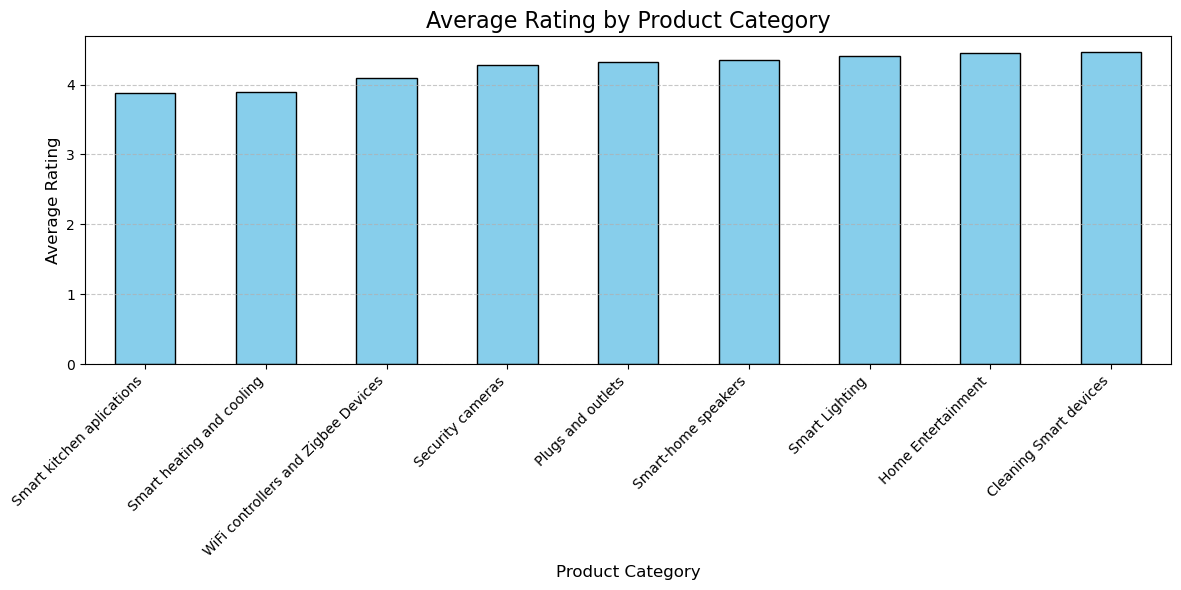

In [ ]:
data_cleaned = df.fillna({'rating': df['rating'].mode()[0]})

avg_rating_per_category = data_cleaned.groupby('category')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_rating_per_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Rating by Product Category', fontsize=16)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() #Adjusts subplot parameters
plt.show()

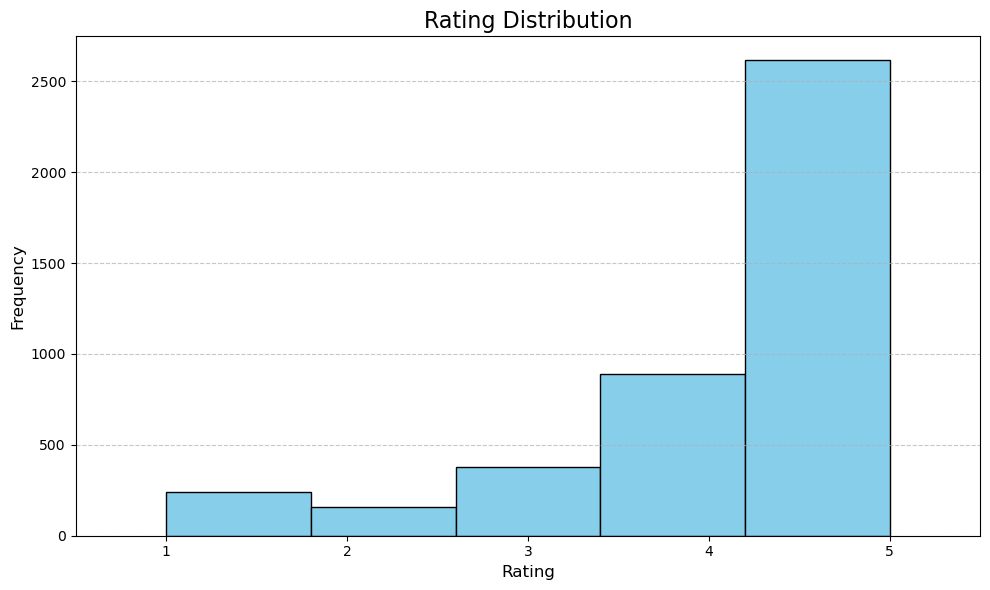

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['rating'].dropna(), bins=5, color='skyblue', edgecolor='black')

plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0.5, 5.5)  
plt.tight_layout()
plt.show()

C:\Users\Albert\AppData\Local\Temp\ipykernel_31716\1780245659.py:10: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  plt.tight_layout()
C:\Users\Albert\AppData\Local\Temp\ipykernel_31716\1780245659.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\Albert\Downloads\123\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


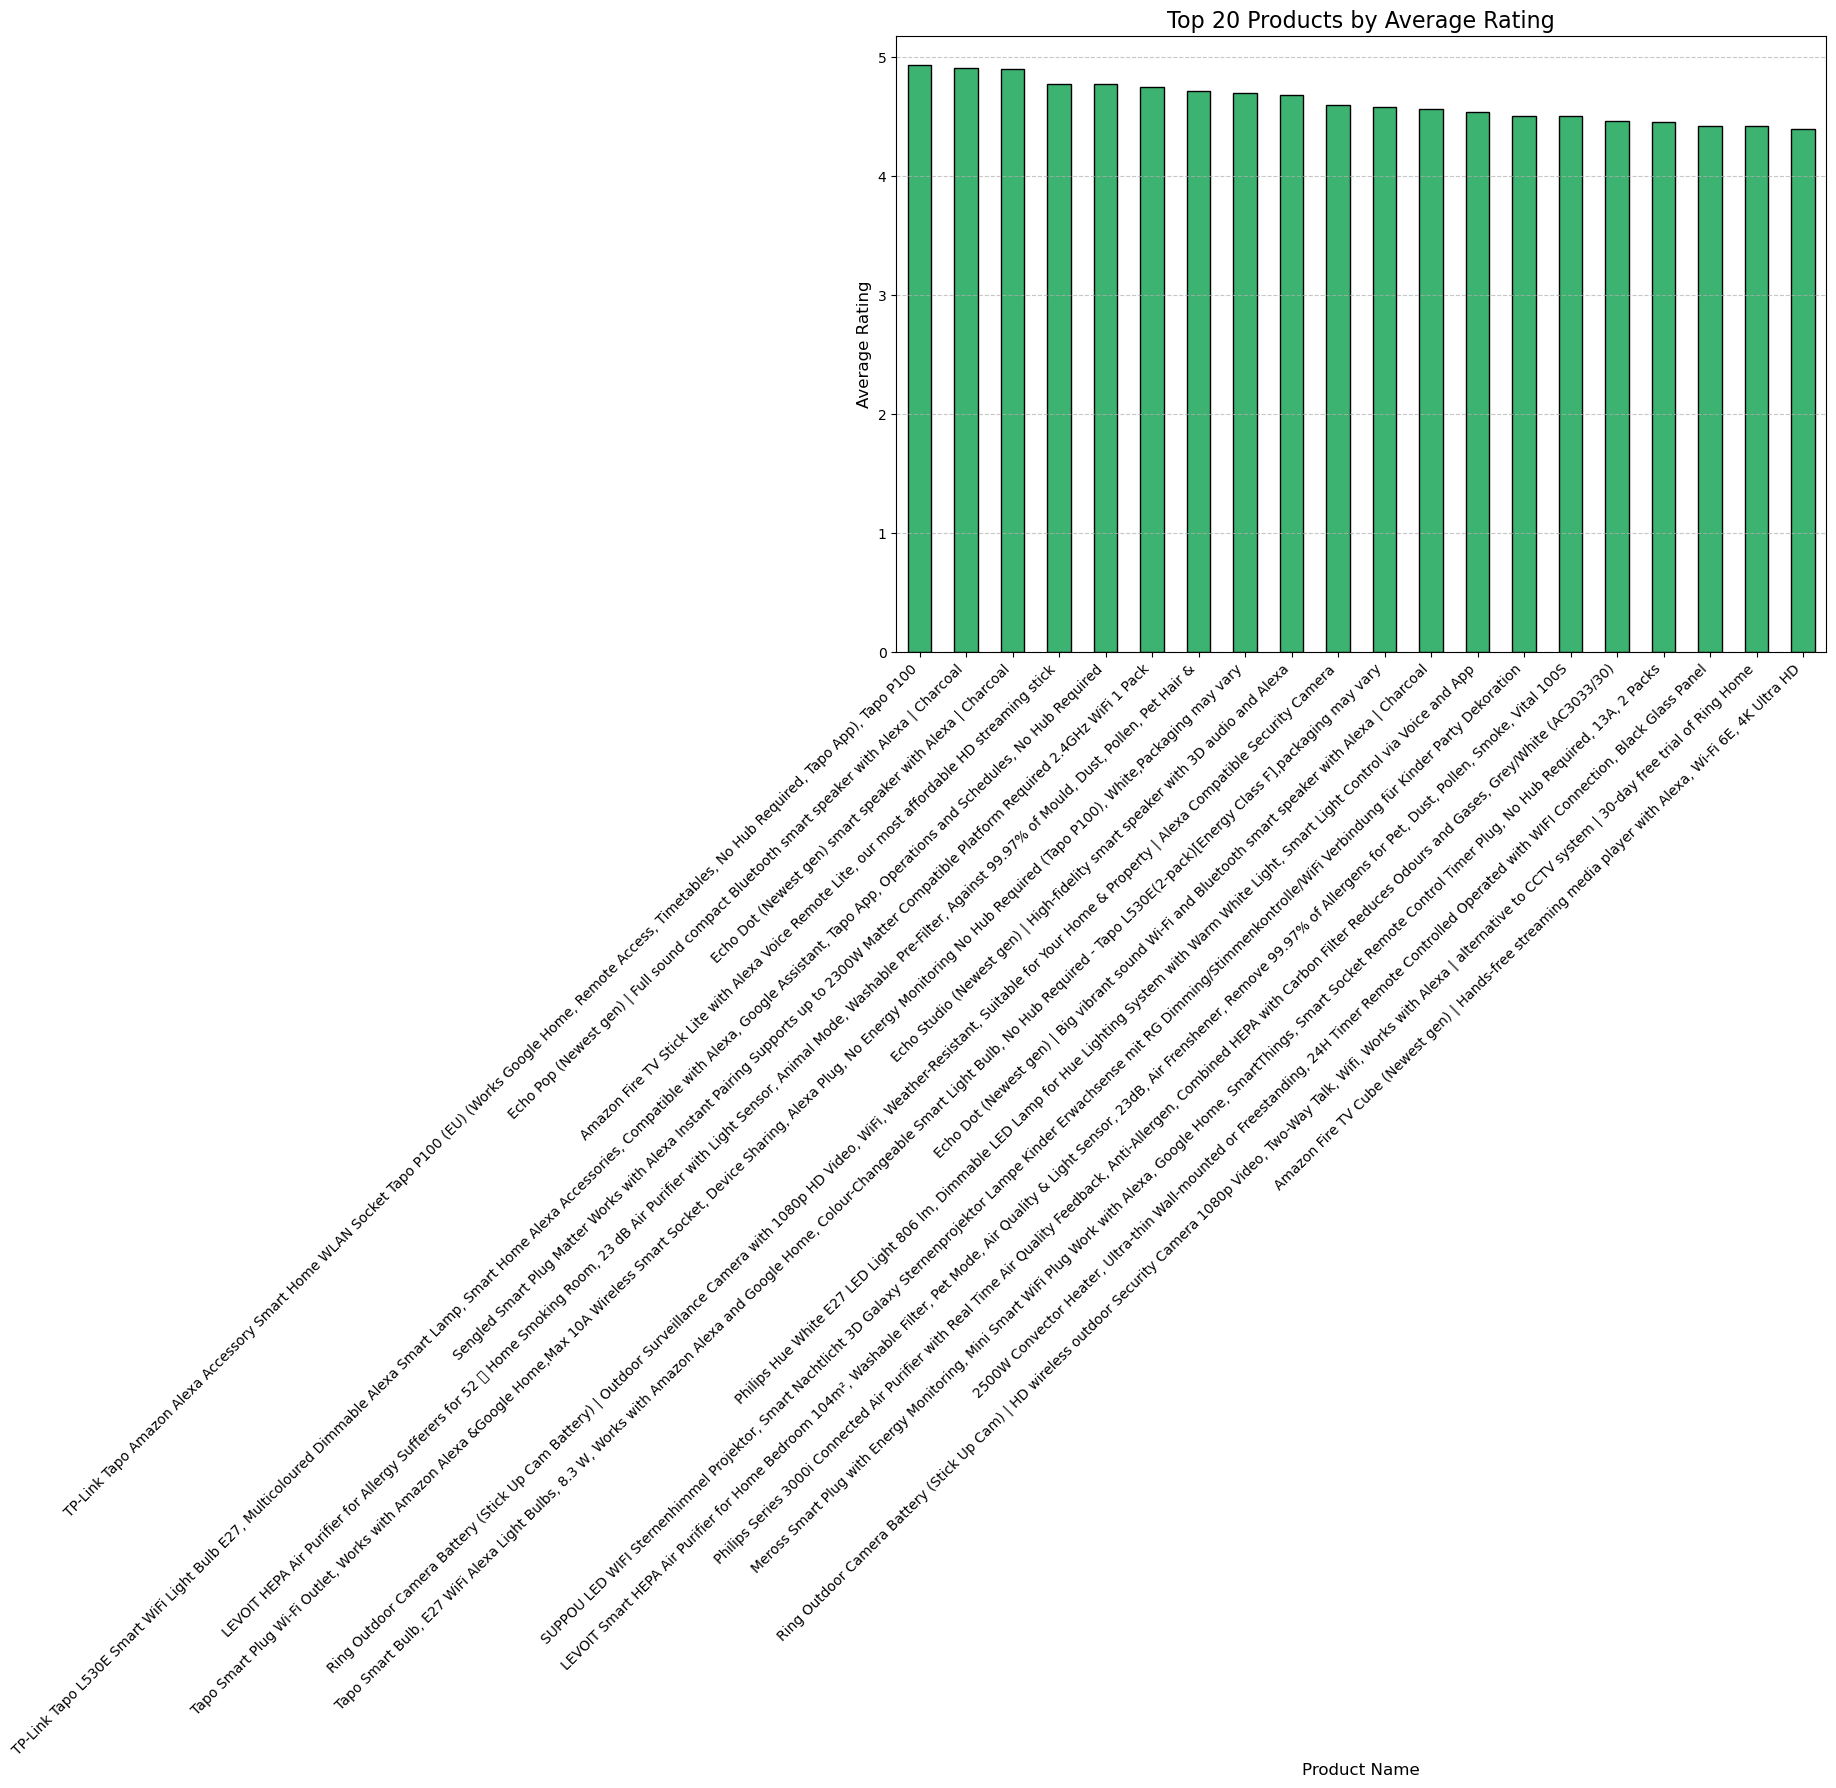

,rating
prod_name,
"TP-Link Tapo Amazon Alexa Accessory Smart Home WLAN Socket Tapo P100 (EU) (Works Google Home, Remote Access, Timetables, No Hub Required, Tapo App), Tapo P100",4.928571
Echo Pop (Newest gen) | Full sound compact Bluetooth smart speaker with Alexa | Charcoal,4.910000
Echo Dot (Newest gen) smart speaker with Alexa | Charcoal,4.900000
"Amazon Fire TV Stick Lite with Alexa Voice Remote Lite, our most affordable HD streaming stick",4.776471
"TP-Link Tapo L530E Smart WiFi Light Bulb E27, Multicoloured Dimmable Alexa Smart Lamp, Smart Home Alexa Accessories, Compatible with Alexa, Google Assistant, Tapo App, Operations and Schedules, No Hub Required",4.770000
Sengled Smart Plug Matter Works with Alexa Instant Pairing Supports up to 2300W Matter Compatible Platform Required 2.4GHz WiFi 1 Pack,4.750000
"LEVOIT HEPA Air Purifier for Allergy Sufferers for 52 ㎡ Home Smoking Room, 23 dB Air Purifier with Light Sensor, Animal Mode, Washable Pre-Filter, Against 99.97% of Mould, Dust, Pollen, Pet Hair &",4.710000
"Tapo Smart Plug Wi-Fi Outlet, Works with Amazon Alexa &Google Home,Max 10A Wireless Smart Socket, Device Sharing, Alexa Plug, No Energy Monitoring No Hub Required (Tapo P100), White,Packaging may vary",4.700000
Echo Studio (Newest gen) | High-fidelity smart speaker with 3D audio and Alexa,4.680000


In [ ]:
avg_rating_by_prod = df.groupby('prod_name')['rating'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
avg_rating_by_prod.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Top 20 Products by Average Rating', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

pd.DataFrame(avg_rating_by_prod)

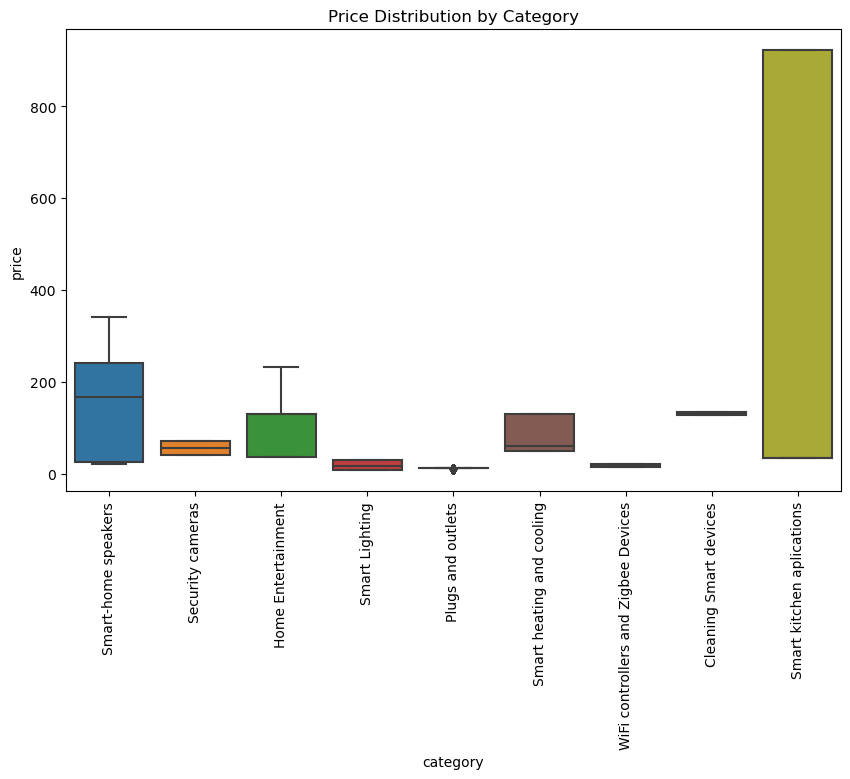

Category price statistics:


,category,mean,median,min,max
0,Cleaning Smart devices,130.995000,130.995,127.99,134.00
1,Home Entertainment,121.641927,129.000,34.99,232.68
2,Plugs and outlets,11.413793,11.990,8.90,12.40
3,Security cameras,54.990000,54.990,39.99,69.99
4,Smart Lighting,17.525117,15.990,6.72,29.99
5,Smart heating and cooling,79.853333,59.770,49.99,129.80
6,Smart kitchen aplications,367.726989,33.620,33.62,921.39
7,Smart-home speakers,158.535455,167.000,19.99,339.99
8,WiFi controllers and Zigbee Devices,17.590000,17.590,15.19,19.99


In [ ]:
category_stats = df.groupby('category')['price'].agg(['mean', 'median', 'min', 'max']).reset_index()
grouped = df.groupby('category')['price']

plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Category')
plt.show()

print("Category price statistics:")
pd.DataFrame(category_stats)

C:\Users\Albert\AppData\Local\Temp\ipykernel_31716\3186928660.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='price', data=df, estimator=np.mean, ci=None)


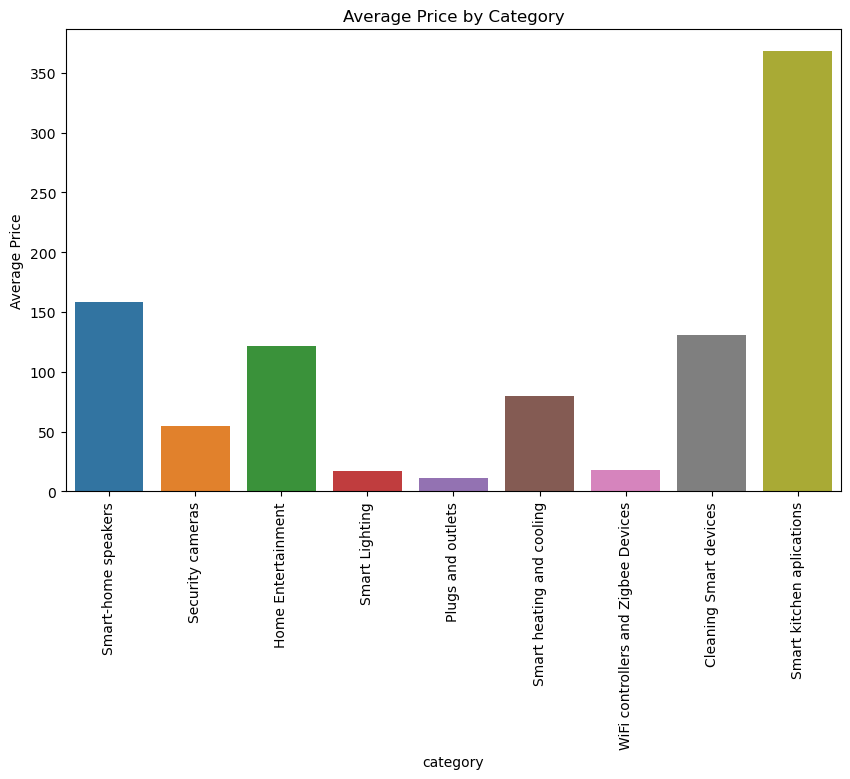

In [ ]:
category_groups = [group['price'].values for name, group in df.groupby('category')]

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='price', data=df, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title('Average Price by Category')
plt.ylabel('Average Price')
plt.show()
